In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['DESCR', 'feature_names', 'data', 'target_names', 'target'])

In [7]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])#convert to data frame

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df) #normalize data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

In [13]:
# PCA
from sklearn.decomposition import PCA



In [14]:
pca = PCA(n_components=2)

In [15]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
x_pca = pca.transform(scaled_data)

In [22]:
x_pca_2d = pd.DataFrame(x_pca)

x_pca_2d.columns = ['PC1','PC2']
x_pca_2d.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [23]:

print(pca.explained_variance_ratio_) #variance explained by the first PC

[ 0.44272026  0.18971182]


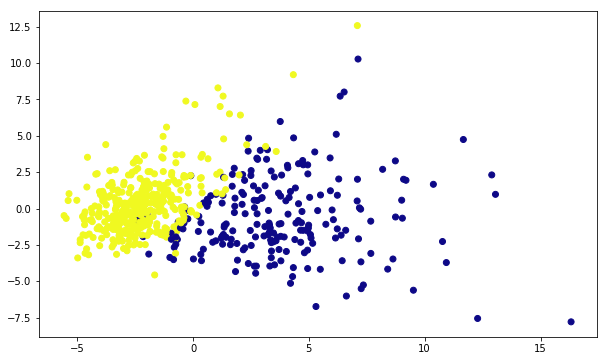

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel = "First Principal Component"
plt.ylabel = "Second Principal component"
plt.show()

#### which components contribute to explaining PC variation

In [18]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

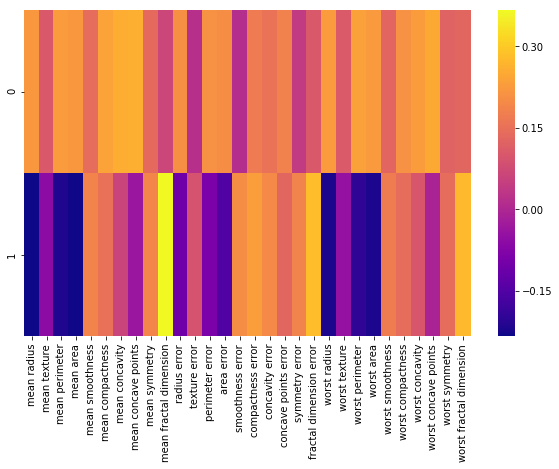

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df_comp, cmap='plasma')

In [ ]:
##